<a href="https://colab.research.google.com/github/shamp00/ra_colabs/blob/master/Deep_Learning_with_Python_3_4_IMDB_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning with Python 3.4

##Classifying movie reviews

A two-class binary classification example: positive vs negative.

In [0]:
from keras.datasets import imdb

# load the data - keep only the top 10000 words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

 # imdb provides a dictiomary mapping words to indexes which we need later
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


We are only considering the top 10000 words. 

`train_data` contains a series of word indices. Here's the first one:

```python
>>>train_data[0]
[1, 14, 22, ..., 178, 32]
```

`train_labels` contains the corresponding sentiment. Here's the first one:
```python
>>>train_labels[0]
1
```

Next, we decode one of these reviews back into English:

In [0]:
import textwrap

# we need the reverse, a dictionary mapping indexes to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# now we can decode the review
review = train_data[0]
# we offset by 3 because first three are reserved (padding, start of sequence and unknown)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

print(textwrap.fill(decoded_review, 80))


? this film was just brilliant casting location scenery story direction
everyone's really suited the part they played and you could just imagine being
there robert ? is an amazing actor and now the same being director ? father came
from the same scottish island as myself so i loved the fact there was a real
connection with this film the witty remarks throughout the film were great it
was just brilliant so much that i bought the film as soon as it was released for
? and would recommend it to everyone to watch and the fly fishing was amazing
really cried at the end it was so sad and you know what they say if you cry at a
film it must have been good and this definitely was also ? to the two little
boy's that played the ? of norman and paul they were just brilliant children are
often left out of the ? list i think because the stars that play them all grown
up are such a big profile for the whole film but these children are amazing and
should be praised for what they have done don't you thi

##Preparing the data

We need vectors, not lists of integers. 

One-hot encoding of integer arrays. That is, each review will be a 10000 dimension vector with a 1 or a 0 in each position depending whether or not the word appears in the review.



In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results
  
# vectorize samples  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vextorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Set aside a validation set of 10000 from the training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

##Build the network

We are trusting Monsieur Chollet at this point.

*  An input layer (vectorised text)
*  A hidden layer with 16 units and `relu` activation
*  A hidden layer with 16 units and `relu` activation
*  An output layer consisting of the scalar prediction of sentiment (`sigmoid` activation to get a value between 0 and 1) 

We choose `binary_crossentropy` as the _loss function_. We could use `mean_squared_error`, but cross-entropy is often the best when outputting probabilities. It is an information-theory quantity that measures the distance between distributions (in this case, the ground-truth distribution and our predictions).

We choose `rmsprop` as the optimizer.

We'll monitor accuracy.

In [0]:
from keras import models
from keras import layers

# Configure the layers
model = models.Sequential()
model.add(layers.Dense(16, name='hidden_layer_1', activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, name='hidden_layer_2', activation='relu'))
model.add(layers.Dense(1, name='output_layer', activation='sigmoid'))

# Choose a loss function and an optimiser. Monitor accuracy.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 16)                160016    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 16)                272       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


##Visualise the network architecture

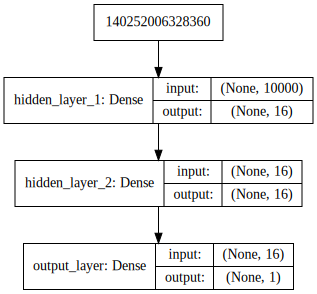

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

##Train the model for 20 epochs


In [0]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.5049 - acc: 0.7870 - val_loss: 0.3775 - val_acc: 0.8701
Epoch 2/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.2993 - acc: 0.9046 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.2175 - acc: 0.9284 - val_loss: 0.3082 - val_acc: 0.8720
Epoch 4/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1748 - acc: 0.9437 - val_loss: 0.2826 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.1422 - acc: 0.9539 - val_loss: 0.2855 - val_acc: 0.8860
Epoch 6/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1148 - acc: 0.9652 - val_loss: 0.3153 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 3s 168us/step - 

##Plot training and validation loss

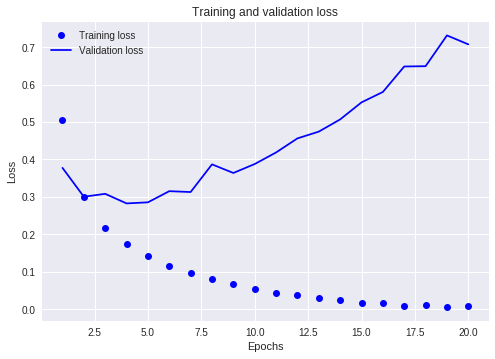

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' is 'blue dot'
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' is 'solid blue line'
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


##Plot training and validation accuracy

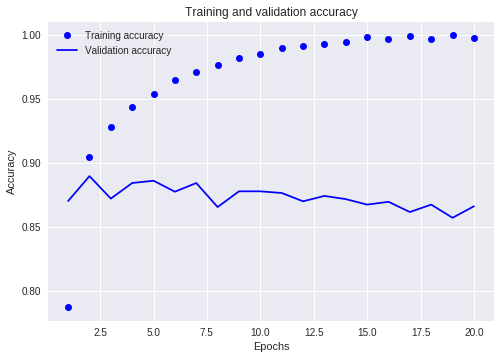

In [0]:
plt.clf() # clear the figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy') # 'bo' is 'blue dot'
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy') # 'b' is 'solid blue line'
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


##Analysis

The _training_ loss and accuracy just get better and better. But _validation_ loss and validation accuracy peak at about epoch 4.

By using 20 epochs we are _overfitting_. 

## Final model
Let's train a new network from scratch for 4 epochs.

In [0]:
# Configure the layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Choose a loss function and an optimiser. Monitor accuracy.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=4,   # only 4 epochs this time
                    batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

print()
print(f'Results [loss, accuracy] = {results}')

#Show some predictions
predictions = model.predict(x_test[:10])

print('First 10 predictions')
print(predictions)


Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 203us/step - loss: 0.5216 - acc: 0.8025 - val_loss: 0.3976 - val_acc: 0.8656
Epoch 2/4
15000/15000 [==============================] - 3s 170us/step - loss: 0.3169 - acc: 0.8969 - val_loss: 0.3163 - val_acc: 0.8803
Epoch 3/4
15000/15000 [==============================] - 3s 168us/step - loss: 0.2323 - acc: 0.9253 - val_loss: 0.2811 - val_acc: 0.8916
Epoch 4/4
25000/25000 [==============================] - 2s 68us/step

Results [loss, accuracy] = [0.28958480754852295, 0.88316]
First 10 predictions
[[0.31009817]
 [0.9986479 ]
 [0.8991208 ]
 [0.72334474]
 [0.9026884 ]
 [0.83131695]
 [0.99796   ]
 [0.06170729]
 [0.91312796]
 [0.9777608 ]]
